In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
%matplotlib inline

In [2]:
# api_key = 'U93z8Z-2erhNJgpJ1mNy'
# api_url = "https://www.quandl.com/api/v3/datasets/WIKI/GOOGL/data.json?api_key={}".format(api_key)
# params = {'limit': 1000}
# response = requests.get(api_url, params=params)
# m_dict = response.json()
df = pd.read_csv('daily_TSLA.csv', parse_dates=['timestamp']).sort_values('timestamp').set_index('timestamp')
df.head()

,open,high,low,close,volume
timestamp,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300
2010-06-30,25.79,30.4192,23.30,23.83,17187100
2010-07-01,25.00,25.9200,20.27,21.96,8218800
2010-07-02,23.00,23.1000,18.71,19.20,5139800
2010-07-06,20.00,20.0000,15.83,16.11,6866900


In [3]:
small_ma = 50
long_ma = 200
sm = df.close.rolling(small_ma).mean()
lo = df.close.rolling(long_ma).mean()

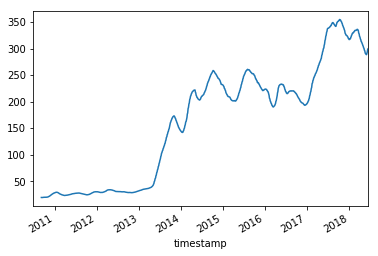

In [5]:
sm.plot()

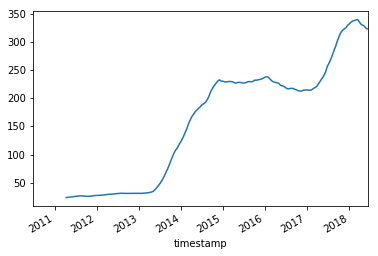

In [6]:
lo.plot()

In [7]:
def moving_average(df, small_ma, lomg_ma):
    sm = df.close.rolling(small_ma).mean()
    lo = df.close.rolling(long_ma).mean()
    buy = sm > lo
    sell = sm < lo
    return buy,sell

In [11]:
buy, sell = moving_average(df, 50, 200)

In [123]:
portfolio = 100
def backtest(df, buy, sell, capital, ini_shares, number = 10):
    portfolio = ini_shares
    cash = capital
    df['buy'] = buy
    df['sell'] = sell
    trades = []
    for index, row in df[(df['buy'] == True) | (df['sell'] == True)].iterrows():
        trade = {}
        trade['price'] = row['close']
        trade['timestamp'] = index
        if(row['buy']):
            portfolio += number
            cash = cash - number*(row['close'])
            trade['portfolio'] = portfolio
            trade['cash'] = cash
            trade['type'] = 'buy'
        elif(row['sell']):
            portfolio -= number
            cash = cash + number*(row['close'])
            trade['portfolio'] = portfolio
            trade['cash'] = cash
            trade['type'] = 'sell'
        trades.append(trade)
    return trades

In [122]:
backtest(df, buy, sell, 1000000, portfolio, 10)

[{'cash': 999753.5, 'portfolio': 110, 'timestamp': Timestamp('2011-04-12 00:00:00'), 'price': 24.65, 'type': 'buy'}, {'cash': 999504.2, 'portfolio': 120, 'timestamp': Timestamp('2011-04-13 00:00:00'), 'price': 24.93, 'type': 'buy'}, {'cash': 999252.7999999999, 'portfolio': 130, 'timestamp': Timestamp('2011-04-14 00:00:00'), 'price': 25.14, 'type': 'buy'}, {'cash': 998996.9999999999, 'portfolio': 140, 'timestamp': Timestamp('2011-04-15 00:00:00'), 'price': 25.58, 'type': 'buy'}, {'cash': 998746.6999999998, 'portfolio': 150, 'timestamp': Timestamp('2011-04-18 00:00:00'), 'price': 25.03, 'type': 'buy'}, {'cash': 998495.0999999999, 'portfolio': 160, 'timestamp': Timestamp('2011-04-19 00:00:00'), 'price': 25.16, 'type': 'buy'}, {'cash': 998237.5999999999, 'portfolio': 170, 'timestamp': Timestamp('2011-04-20 00:00:00'), 'price': 25.75, 'type': 'buy'}, {'cash': 997970.1999999998, 'portfolio': 180, 'timestamp': Timestamp('2011-04-21 00:00:00'), 'price': 26.74, 'type': 'buy'}, {'cash': 997706.2